**This notebook is an exercise in the [Introduction to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/dansbecker/your-first-machine-learning-model).**

---


## Recap
So far, you have loaded your data and reviewed it with the following code. Run this cell to set up your coding environment where the previous step left off.

In [1]:
# Code you have previously used to load data
import pandas as pd

# Path of the file to read
iowa_file_path = '../input/home-data-for-ml-course/train.csv'

home_data = pd.read_csv(iowa_file_path)

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex3 import *

print("Setup Complete")

Setup Complete


# Exercises

## Step 1: Specify Prediction Target
Select the target variable, which corresponds to the sales price. Save this to a new variable called `y`. You'll need to print a list of the columns to find the name of the column you need.


In [2]:
# Printing the name of the columns
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
len(home_data.columns)

81

We have altogether 81 column and we are interested to predict the SalePrice so it will be our y variabel.

In [4]:
y = home_data['SalePrice']

# Check your answer
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [5]:
# Printing the value of y

print(y.head())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


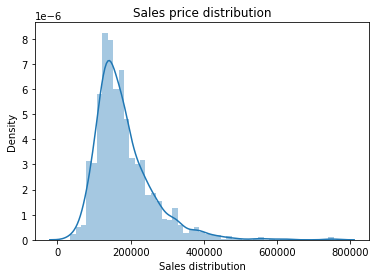

In [7]:
# Title of my plot

plt.title('Sales price distribution')

# Creating a distribution plot

sns.distplot(x = home_data['SalePrice'],kde = True)

# Adding labels

plt.xlabel('Sales distribution')

plt.show()

In [8]:
# The lines below will show you a hint or the solution.
# step_1.hint() 
# step_1.solution()

## Step 2: Create X
Now you will create a DataFrame called `X` holding the predictive features.

Since you want only some columns from the original data, you'll first create a list with the names of the columns you want in `X`.

You'll use just the following columns in the list (you can copy and paste the whole list to save some typing, though you'll still need to add quotes):
    * LotArea
    * YearBuilt
    * 1stFlrSF
    * 2ndFlrSF
    * FullBath
    * BedroomAbvGr
    * TotRmsAbvGrd

After you've created that list of features, use it to create the DataFrame that you'll use to fit the model.

In [9]:
# Create the list of features below
feature_names = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']

# Select data corresponding to features in feature_names
X = home_data[feature_names]

# Check your answer
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [10]:
# Let's see how our X variable looks like

X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [11]:
# step_2.hint()
# step_2.solution()

## Review Data
Before building a model, take a quick look at **X** to verify it looks sensible

In [12]:
# Review data
# print description or statistics from X
#print(_)

# print the top few lines
#print(_)

X.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000


The new dataset X looks fine to me.

## Step 3: Specify and Fit Model
Create a `DecisionTreeRegressor` and save it iowa_model. Ensure you've done the relevant import from sklearn to run this command.

Then fit the model you just created using the data in `X` and `y` that you saved above.

In [13]:
# lets import the decision tree

from sklearn.tree import DecisionTreeRegressor

#For model reproducibility, set a numeric value for random_state when specifying the model
iowa_model = DecisionTreeRegressor(random_state =1)

# Fit the model
iowa_model.fit(X,y)

# Check your answer
step_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [14]:
# step_3.hint()
# step_3.solution()

## Step 4: Make Predictions
Make predictions with the model's `predict` command using `X` as the data. Save the results to a variable called `predictions`.

In [15]:
# Making predictions

predictions = iowa_model.predict(X)
print(predictions)

# Check your answer
step_4.check()

[208500. 181500. 223500. ... 266500. 142125. 147500.]


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

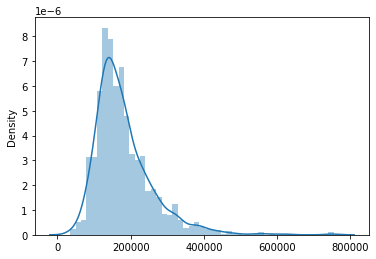

In [16]:
# let's plot our predictions value

sns.distplot(x = predictions, kde = True)




/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

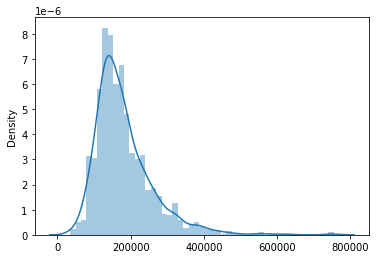

In [17]:
sns.distplot(x = home_data['SalePrice'],kde = True)

In [18]:
# step_4.hint()
# step_4.solution()

## Think About Your Results

Use the `head` method to compare the top few predictions to the actual home values (in `y`) for those same homes. Anything surprising?


In [19]:
# Let's compare the first 5 values from the predited value and the actual value

# Actual values

y.head()


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [20]:
predictions[0:5]

array([208500., 181500., 223500., 140000., 250000.])

So from the above observation we can see that the predicted values are almost similar to the actual values.

It's natural to ask how accurate the model's predictions will be and how you can improve that. That will be you're next step.

# Keep Going

You are ready for **[Model Validation](https://www.kaggle.com/dansbecker/model-validation).**


---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-machine-learning/discussion) to chat with other learners.*